   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.2 MB/s eta 0:00:00
                          Name          Sector    CTC  Year  Recruits
0                  Ramirez Ltd  Cyber Security  17.09  2024        46
1  Moore, Williams and Schmidt         Trading   7.95  2021        33
2                   Nguyen LLC      Automobile  10.37  2023         6
3                   Pena Group     Educational   5.80  2024        34
4                 Rhodes-Jones      Core Engg.   7.11  2023        41


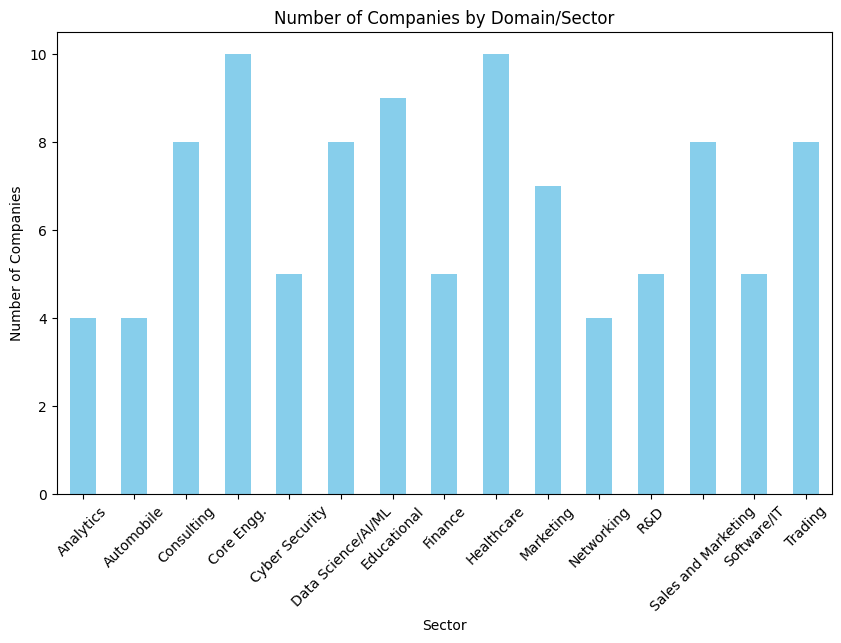

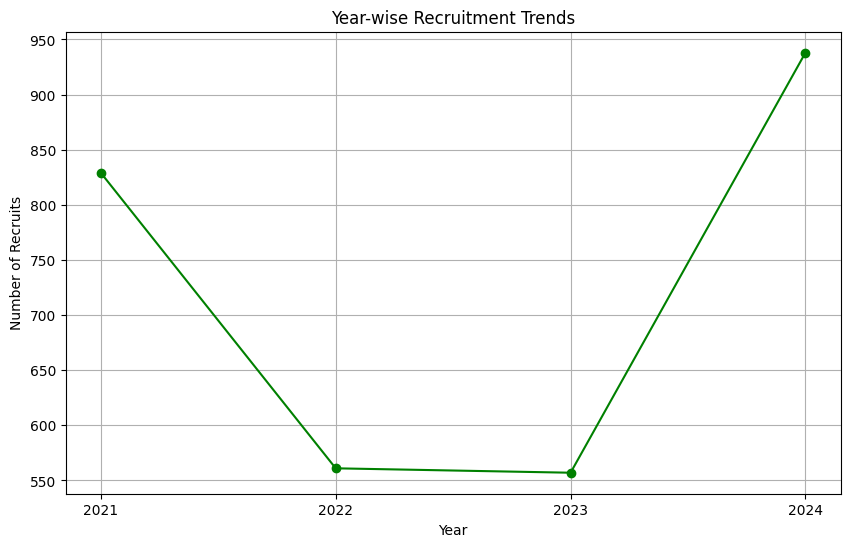

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


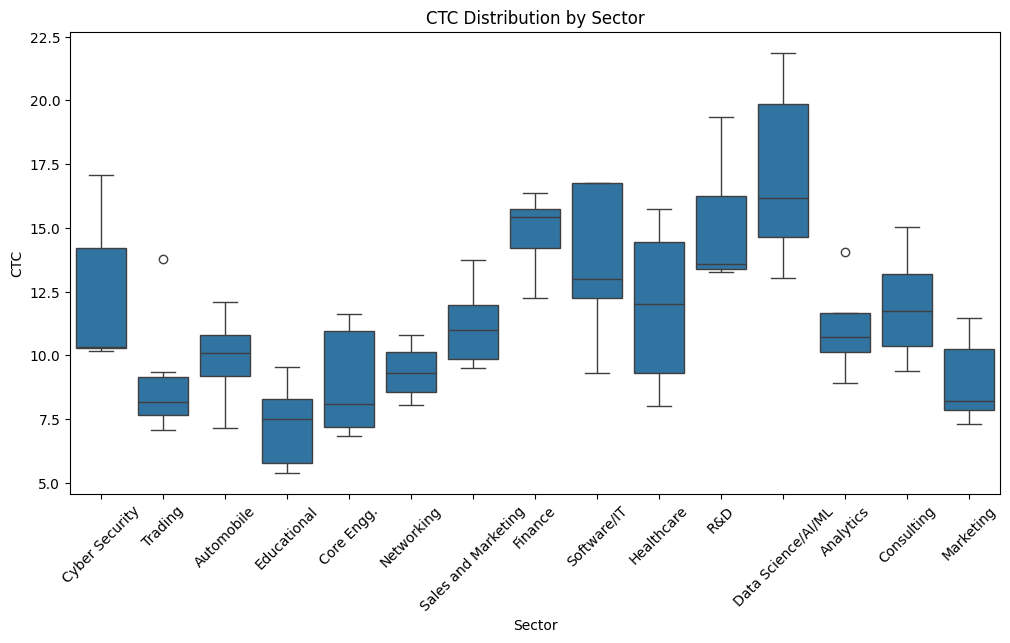

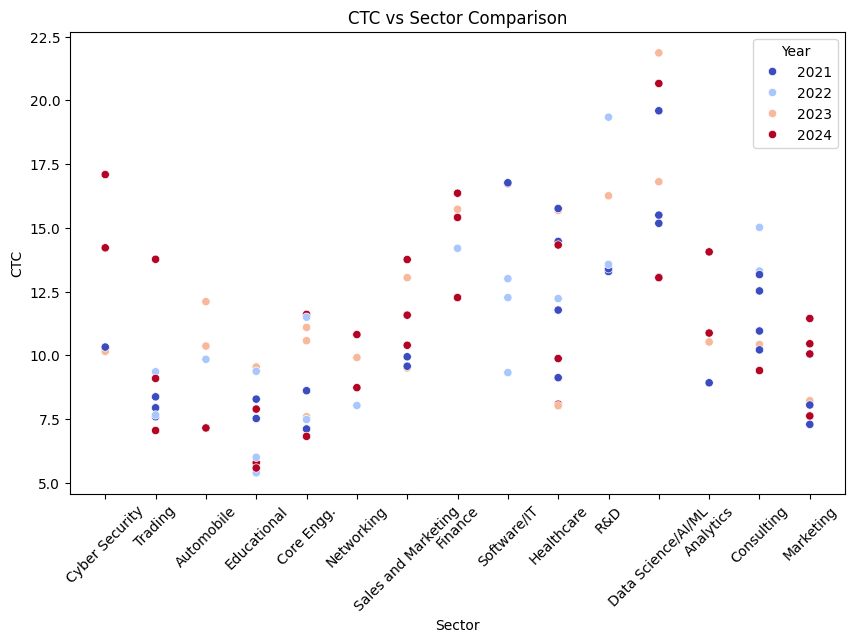

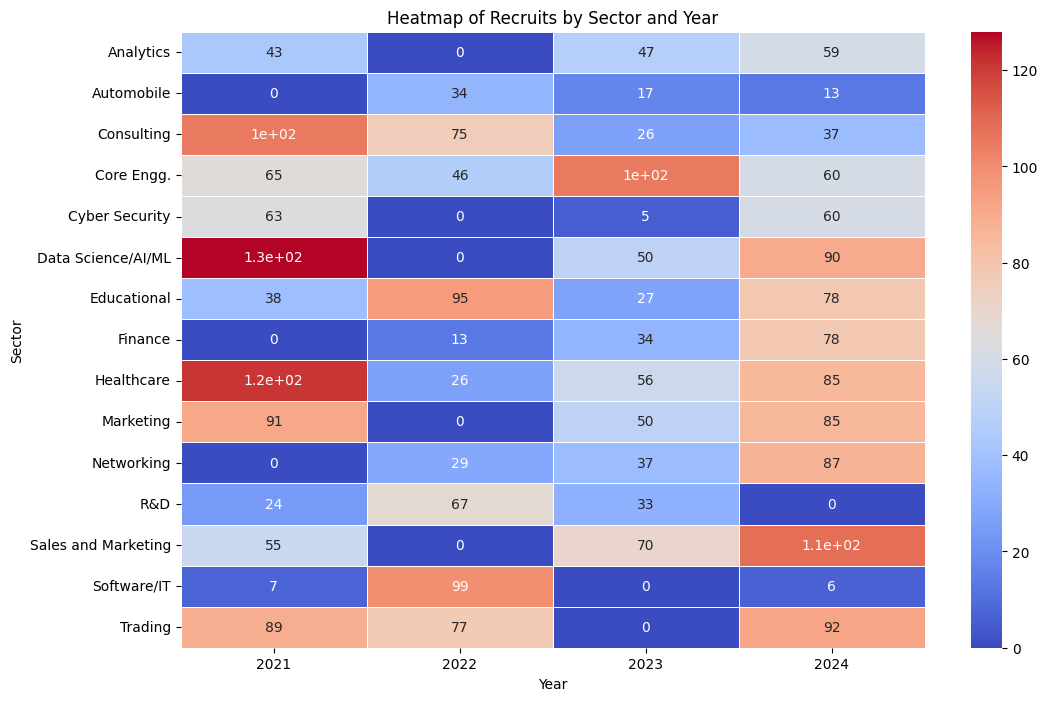

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
!pip install faker
from faker import Faker

# Initialize Faker
fake = Faker()

# Define constants
sectors = ["Core Engg.", "Consulting", "Trading", "Software/IT", "Networking",
           "Automobile", "Finance", "Educational", "Analytics", "Marketing",
           "R&D", "Healthcare", "Data Science/AI/ML", "Cyber Security", "Sales and Marketing"]
years = [2021, 2022, 2023, 2024]  # Year-wise trends
ctc_range = {
    "Core Engg.": (6, 12), "Consulting": (8, 16), "Trading": (7, 14),
    "Software/IT": (8, 18), "Networking": (7, 12), "Automobile": (6, 14),
    "Finance": (10, 20), "Educational": (5, 10), "Analytics": (8, 15),
    "Marketing": (6, 12), "R&D": (10, 20), "Healthcare": (8, 16),
    "Data Science/AI/ML": (12, 22), "Cyber Security": (10, 18),
    "Sales and Marketing": (6, 14)
}

# Generate dummy data for analysis
data = []
for _ in range(100):  # Generate data for 100 companies
    sector = random.choice(sectors)
    recruits_per_year = {year: random.randint(5, 50) for year in years}  # Number of recruits per year
    ctc = round(random.uniform(*ctc_range[sector]), 2)

    company = {
        "Name": fake.company(),
        "Sector": sector,
        "CTC": ctc,
        "Year": random.choice(years),
        "Recruits": recruits_per_year[random.choice(years)]
    }
    data.append(company)

# Create DataFrame
df = pd.DataFrame(data)

# Data Preview
print(df.head())

# Analysis

## 1. Companies by Domain/Sector
# Group by sector and count the number of companies per sector
sector_count = df.groupby("Sector").size()

# 2. Year-wise Recruitment Trends
# Group by year to get the sum of recruits per year
yearly_recruits = df.groupby("Year")["Recruits"].sum()

# 3. CTC Analysis
# Group by sector and calculate average, median, and max CTC
ctc_analysis = df.groupby("Sector")["CTC"].agg(["mean", "median", "max"])

# 4. Domain-wise CTC comparison and other insights
# Group by both sector and year for a detailed recruitment trend and CTC analysis
sector_year_trends = df.groupby(["Sector", "Year"]).agg({"Recruits": "sum", "CTC": ["mean", "max"]})

# Visualization

# 1. Bar chart for companies by domain/sector
plt.figure(figsize=(10, 6))
sector_count.plot(kind='bar', color='skyblue')
plt.title('Number of Companies by Domain/Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

# 2. Line chart for year-wise recruitment trends
plt.figure(figsize=(10, 6))
yearly_recruits.plot(kind='line', marker='o', color='green')
plt.title('Year-wise Recruitment Trends')
plt.ylabel('Number of Recruits')
plt.xticks(years)
plt.grid(True)
plt.show()

# 3. Boxplot for CTC analysis across sectors
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sector", y="CTC", data=df)
plt.title('CTC Distribution by Sector')
plt.xticks(rotation=45)
plt.show()

# 4. Scatter plot for CTC vs Sector comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sector", y="CTC", hue="Year", data=df, palette='coolwarm')
plt.title('CTC vs Sector Comparison')
plt.xticks(rotation=45)
plt.show()

# 5. Heatmap for sector and year-wise recruit trends
pivot_table = df.pivot_table(values='Recruits', index='Sector', columns='Year', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Recruits by Sector and Year')
plt.show()

